# Исследование данных авиакомпании

### Задача:

Необходимо проанализировать данные двух наборов данных.


### Исходные данные:

У нас есть файлы, в которых содержатся результаты ранее выполненных запросов.

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года


### План работы:

1. импортируем файлы;
2. изучим данные в них и проверим типы данных на корректность;
4. выберем топ-10 городов по количеству рейсов;
5. построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
6. Выводы по каждому из графиков, пояснение результатов.

## Шаг 1. Импортируем файлы:

In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import matplotlib.pyplot as plt # импортируем модуль pyplot из matplotlib

In [2]:
df_model = pd.read_csv('/datasets/query_1.csv') # прочитаем файл csv и сохраним данные в таблицу df_model
df_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df_city = pd.read_csv('/datasets/query_3.csv') # прочитаем файл csv и сохраним данные в таблицу df_city
df_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


### Вывод_шаг1:
Данные импортировали и сохранили в таблицы. Данные готовы для изучения.

## Шаг 2: Изучим даные в таблицах и типы данных

In [4]:
df_model.head(10) # напечатаем первые 10 строк таблицы df_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
df_model.info() # вызовем метод info() для получения данных о таблице df_model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
df_city.head(10) # напечатаем первые 10 строк таблицы df_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [7]:
df_city.info() # вызовем метод info() для получения данных о таблице df_city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df_city.city.unique() # напечатаем уникальные значения и количество 'city'

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

In [9]:
df_city.city.value_counts() # посчитаем уникальные значения и количество 'city'

Нижний Новгород    1
Петрозаводск       1
Санкт-Петербург    1
Челябинск          1
Владивосток        1
                  ..
Нягань             1
Усть-Илимск        1
Екатеринбург       1
Братск             1
Тамбов             1
Name: city, Length: 101, dtype: int64

In [10]:
df_city.duplicated().sum() # подсчитаем количества дубликатов в df_city, вызовем метод duplicated() и sum()

0

In [11]:
df_city.isnull().sum() # проверим данные на наличие пропусков 

city               0
average_flights    0
dtype: int64

In [12]:
# Округлим количество рейсов

df_city.average_flights = np.ceil(df_city.average_flights)

In [13]:
# приведем тип данных столбца 'average_flights' к целочисленному

df_city.average_flights = df_city.average_flights.astype('int')

### Вывод_шаг2:

В таблице df_model 8 строк и 2 cтолбца. Тип данные у столбца 'flights_amount' целочисленный int64. 

В таблице df_city 110 строк и 2 столбца. В таблице отсутствуют пропуски и дубликаты. Тип данных у столбца 'average_flights' float64. 

Данных столбца 'average_flights' округлили и привели к целочисленному типу данных (int64), т.к. количество рейсов целые числа.

## Шаг 3: Выберем топ-10 городов по количеству рейсов

In [14]:
# Топ-10 городов по кол-ву рейсов в августе 2018:

top10 = df_city.pivot_table(index='city', values='average_flights')\
        .sort_values(by= 'average_flights', ascending = False).head(10)
top10

,average_flights
city,
Москва,130
Санкт-Петербург,32
Новосибирск,18
Красноярск,12
Екатеринбург,12
Пермь,11
Ростов-на-Дону,11
Брянск,10
Ульяновск,10


### Вывод_шаг3:

Самым популятным пунктом прилета в августе 2018 г. была Москва. 

Вероятно всегда количество прилетов в Москву будет больше, чем в любой другой город России. Это связано с тем, что в Москва крупнейший по численности населения город России, также Москва — крупнейший в общероссийском масштабе финансовый центр, международный деловой центр, промышленный, научный, образовательный и туристический центр. В Москву прилетают самолеты со всей России, стран СНГ и зарубежья. Здесь основной пункт пересадки на рейсы других направлений. 

На втором месте Санкт-Петербург - второй по численности населения город России. Санкт-Петербург — важный экономический, научный и культурный центр России, крупный транспортный узел и туристический центр. В Санкт-Петербург прилетают пассажиры со всего мира. Количество рейсов в Санкт-петербург в 4 раза меньше, чем в Москву.

На третьем месте Новосибирск. Третий по численности населения город России. Новосибирск - крупнейший торговый, деловой, культурный, транспортный, образовательный и научный центр Сибири. 

В топ также попали другие города миллионики: Красноярск, Екатеринбург, Ростов-на-дону, Пермь, а также Брянск и Ульяновск. В этих городах находятся крупные аэропорты. Регулярные пассажирские рейсы в этих городах связаны со многими крупнейшими городами России и/или другими странами. 

Сочи также попал в Топ-10, т.к. это самый крупный и популярный курорт в России на Черноморском побережье. В августе многие ездят отдыхать в Сочи.

Также, в целом, август это период отпусков, время прилета студентов из других городов в крупные города.

### Шаг 4: Графики

Построим графики: 

1) модели самолетов и количество рейсов, 

2) города и количество рейсов, 

3) топ-10 городов и количество рейсов

In [15]:
# выведем таблицу df_model отсортированнуб по убыванию количества прилетов

df_model_top = df_model.pivot_table(index='model', values='flights_amount').sort_values(by= 'flights_amount', ascending = False)
df_model_top

,flights_amount
model,
Cessna 208 Caravan,4557
Bombardier CRJ-200,4446
Sukhoi SuperJet-100,4185
Airbus A321-200,960
Boeing 737-300,630
Airbus A319-100,607
Boeing 767-300,600
Boeing 777-300,300


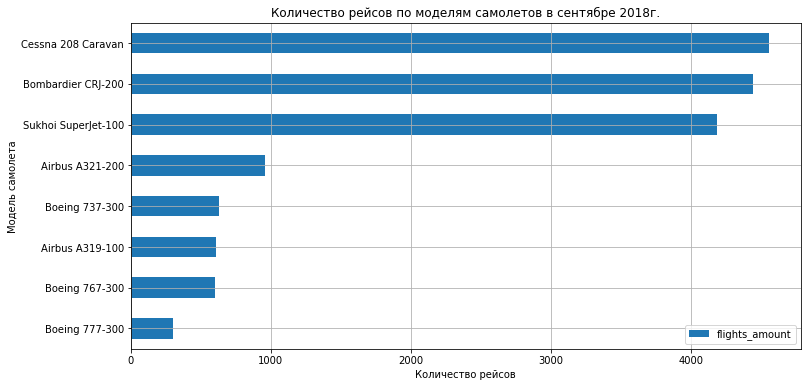

In [16]:
# Построим график зависимости моделей самолетов и количества рейсов в сентябре 2018г.

(df_model
 .pivot_table(index='model', values='flights_amount')
 .sort_values(by= 'flights_amount', ascending = True)
 .plot(y='flights_amount', kind='barh', grid=True, figsize=(12, 6))
)
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')
plt.title('Количество рейсов по моделям самолетов в сентябре 2018г.')
plt.legend(['flights_amount'])
plt.show;

In [17]:
# Таблица с данными о среднем кол-ве прилетов в день по городам отсортированная по убыванию

df_city_flights = df_city.pivot_table(index='city', values='average_flights').sort_values(by= 'average_flights', ascending = False)
df_city_flights.head(20)

,average_flights
city,
Москва,130
Санкт-Петербург,32
Новосибирск,18
Красноярск,12
Екатеринбург,12
Пермь,11
Ростов-на-Дону,11
Брянск,10
Ульяновск,10


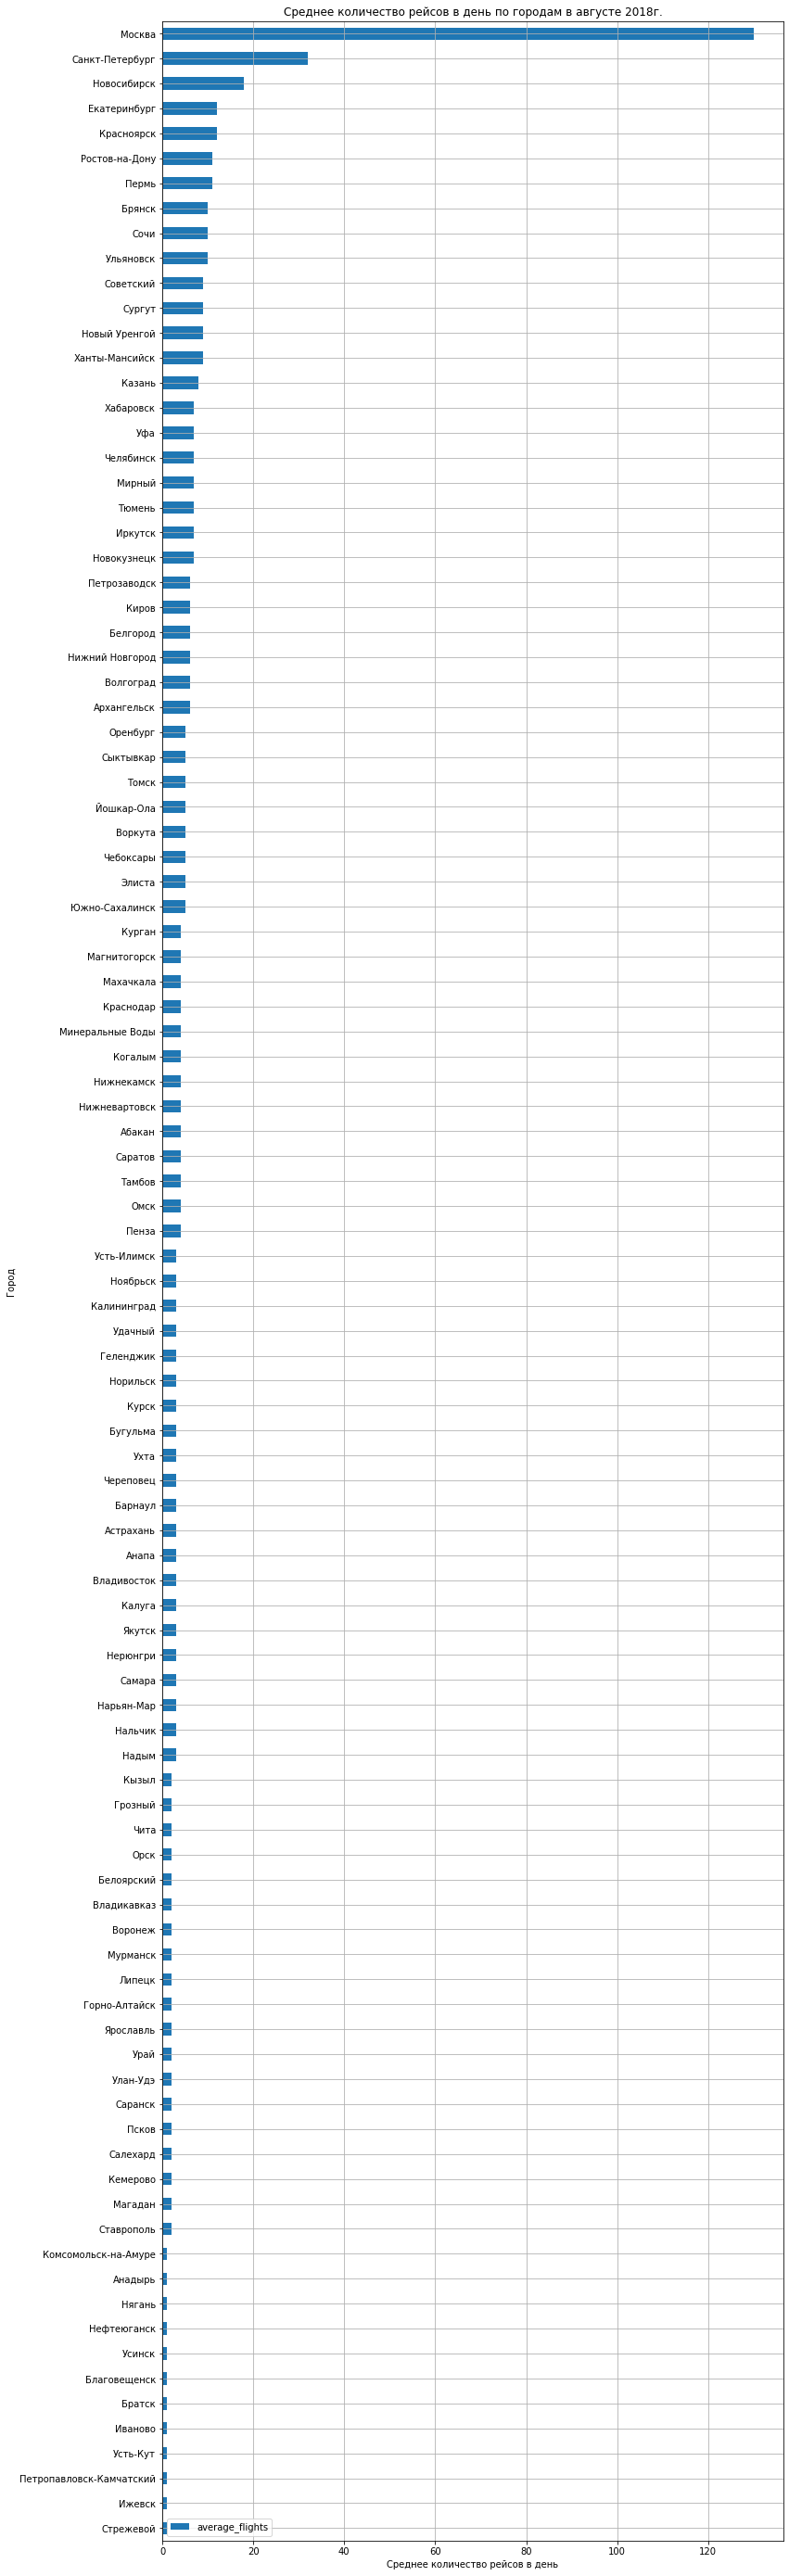

In [18]:
# Построим график среднего количества рейсов по городам в августе 2018 г.

(df_city
 .pivot_table(index='city', values='average_flights')
 .sort_values(by= 'average_flights', ascending = True)
 .plot(y='average_flights', kind='barh',grid=True, figsize=(12, 50))
)
plt.xlabel('Среднее количество рейсов в день')
plt.ylabel('Город')
plt.title('Среднее количество рейсов в день по городам в августе 2018г.')
plt.legend(['average_flights'])
plt.show;

In [19]:
df_city.average_flights.value_counts() # посчитаем количество строк с одинаковыми значениями в столбце 'average_flights'

3      21
2      19
4      13
1      12
5       8
7       7
6       6
9       4
10      3
12      2
11      2
32      1
18      1
130     1
8       1
Name: average_flights, dtype: int64

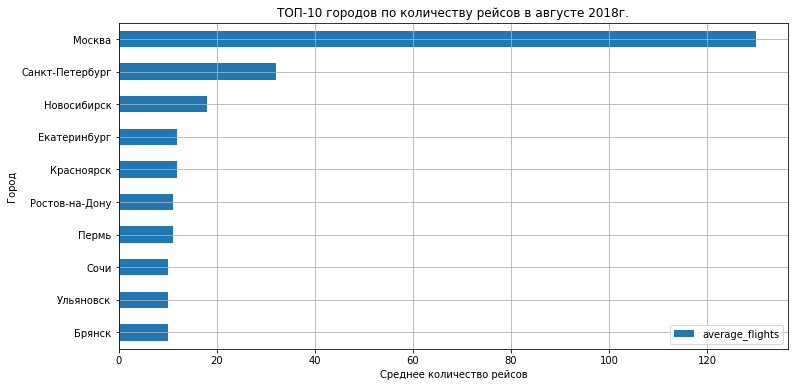

In [20]:
# Построим график ТОП-10 городов по количеству рейсов в августе 2018г.:

top10.sort_values(by= 'average_flights', ascending = True).plot(y='average_flights', kind='barh',grid=True, figsize=(12, 6))
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Город')
plt.title('ТОП-10 городов по количеству рейсов в августе 2018г.')
plt.legend(['average_flights'])
plt.show;

### Вывод_шаг4:

Построили графики:

* 'Количество рейсов по моделям самолетов в сентябре 2018г.'
* 'Среднее количество рейсов в день по городам в августе 2018г.'
* 'ТОП-10 городов по количеству рейсов в августе 2018г.'

## Выводы:

**1.** По данным графика 'Количество рейсов по моделям самолетов в сентябре 2018г.' самая популярная модель самолетов по количеству рейсов в сентябре 2018г. - Cessna 208 Caravan (4557 рейсов).
Отметим, что Cessna 208 Caravan - американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси. Используется на авиалиниях малой протяжённости.

На втором месте Bombardier CRJ-200 (4446 рейсов), на третьем Sukhoi SuperJet-100 (4185 рейсов). Данные по этим трем моделям примерно одинаковые. 

На четветром месте Airbus A321-200	(960 рейсов). Затем идут модели Boeing 737-300 (630 рейсов), Airbus A319-100 (607 рейсов) и Boeing 767-300 (600) с примерно одинаковым количеством рейсов. Меньше всего рейсов у самолетов модели - Boeing 777-300 (300 рейсов).

Данные по моделям самолетов представлены для всего мира и нельзя сказать, что для городов России этот топ будет таким же. Скорее всего для России самыми популярными будут самолеты моделей Sukhoi SuperJet-100 и модели Boeing и Airbus.


**2.** На графике 'Среднее количество рейсов в день по городам в августе 2018г.'  видно, что только для первых 10 городов, количество рейсов от 10 и более. Для остальных городов количества рейсов от 1 - до 9.

Для большинства городов, количество прибывающих рейсов в день составляет: 
* для 21 города - 3 рейса, 
* для 19 городов - 2 рейса, 
* для 13 городов - 4 рейса, 
* для 12 городов - 1 рейс,
* для 8 городов - 5 рейсов,
* для 7 городов - 7 рейсов,
* для 6 городов - 6 рейсов,
* для 4 городов - 9 рейсов.

Малое количество рейсов связано в первыю очерель с небольшой численностью населения в данных городах.


**3.** Согласно графику 'ТОП-10 городов по количеству рейсов в августе 2018г.' самый популярный город прилета в августе 2018г. - Москва (130 рейсов в день). На втором место - Санкт-петербург (32 рейса) и на третьем месте -Новосибирск (18 рейсов за день). Для остальных городов в топ-10 количество рейсов примерно одиноковое.

Вероятно всегда количество прилетов в Москву будет больше, чем в любой другой город России. Это связано с тем, что в Москва крупнейший по численности населения город России, также Москва — крупнейший в общероссийском масштабе финансовый центр, международный деловой центр, промышленный, научный, образовательный и туристический центр. В Москву прилетают самолеты со всей России, стран СНГ и зарубежья. Здесь основной пункт пересадки на рейсы других направлений. 

На втором месте Санкт-Петербург - второй по численности населения город России. Санкт-Петербург — важный экономический, научный и культурный центр России, крупный транспортный узел и туристический центр. В Санкт-Петербург прилетают пассажиры со всего мира. Количество рейсов в Санкт-петербург в 4 раза меньше, чем в Москву.

На третьем месте Новосибирск. Третий по численности населения город России. Новосибирск - крупнейший торговый, деловой, культурный, транспортный, образовательный и научный центр Сибири.  Количество рейсов в Новосибирск почти в 14 раза меньше, чем в Москву. 

В ТОП-10 также попали другие города миллионики: Красноярск, Екатеринбург, Ростов-на-дону, Пермь, а также Брянск и Ульяновск. В этих городах находятся крупные аэропорты. Регулярные пассажирские рейсы в этих городах связаны со многими крупнейшими городами России и/или другими странами. 

Сочи также попал в Топ-10, т.к. это самый крупный и популярный курорт в России на Черноморском побережье. В августе многие ездят отдыхать в Сочи.

Также, в целом, август это период отпусков, время прилета студентов из других городов в крупные города.